<a href="https://colab.research.google.com/github/EricSnunes/AnaliseDeDados/blob/main/Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rótulos:  [1 1 1 0 0 0]
Fazendo previsões com base nos clusters (aglomerados):


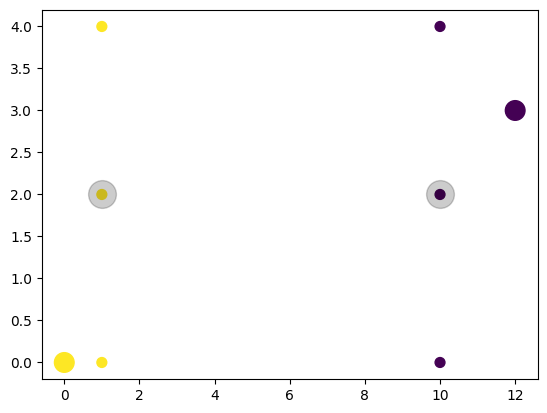

In [ ]:
#imports para criar os graficos, importar os algoritimos e a manipulação de listas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
#X é uma matriz de pontos de dados. Cada ponto tem duas dimensões e ajusta ao X
X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
# determina a qual cluster cada ponto em X pertence(agrupamento)
agrupamento = kmeans.predict(X)
#plota os pontos x, pintando seus agrupamentos e prontando seu centro
plt.scatter(X[:, 0], X[:, 1], c=agrupamento, s=50, cmap='viridis')
centroides = kmeans.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', s=400, alpha=0.2)
#imprime os rotulos
print('Rótulos: ', kmeans.labels_)
print('Fazendo previsões com base nos clusters (aglomerados):')
#de acordo com a distancia euclidiana, as previsões são essas.
pontos = np.array([[0, 0], [12, 3]])
previsoes = kmeans.predict(pontos)
#plotamos e mostramos a previsãono grafico.
plt.scatter(pontos[:, 0], pontos[:, 1], c=previsoes, s=200, cmap='viridis')
plt.show()

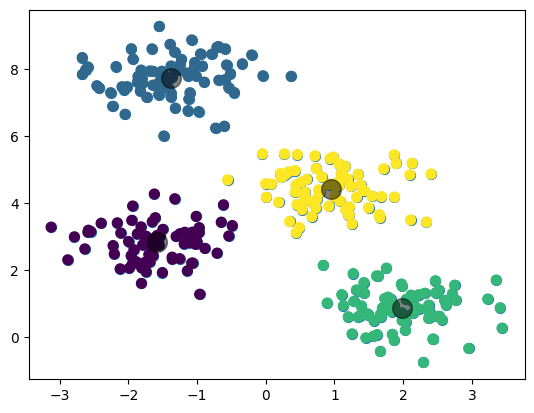

In [ ]:
#imports para criar os graficos, importar os algoritimos e a manipulação de listas
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
#Criamos dados aleatórios, agrupados em 4 centros
X, y_true = make_blobs(n_samples=300, centers=4,
cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)
#import dos clusters e definindo a quantidade de clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
#ajuste da variavel dentro do eixo X
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
#plotando os clusters e os centroides
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centroides = kmeans.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', s=200, alpha=0.5)
plt.show()

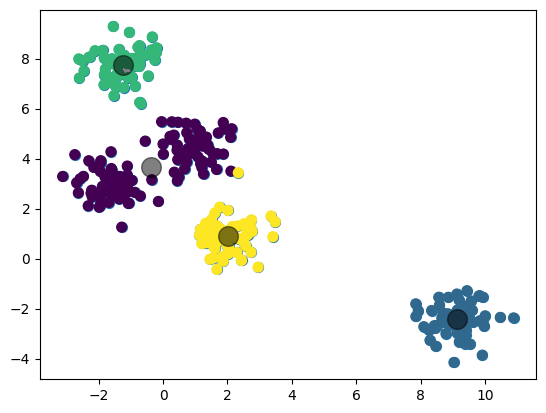

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
# 5 centros nesse caso
X, y_true = make_blobs(n_samples=300, centers=5,
cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centroides = kmeans.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', s=200, alpha=0.5)
plt.show()

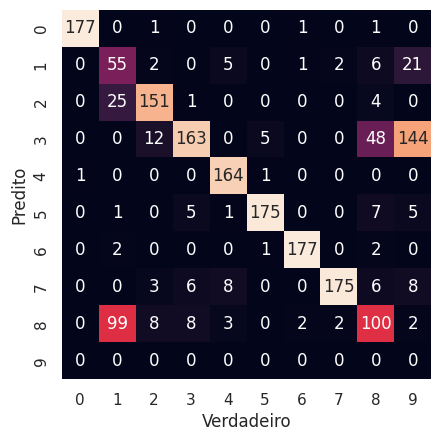

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns; sns.set()  # estilo do gráfico
from sklearn.datasets import load_digits
from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix

# Carregar os dados
digits = load_digits()

# K-means com 10 clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)  # é igual a chamar o fit e depois o predict

# Mapear os clusters para os rótulos reais
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Calcular a acurácia (opcional)
# print(accuracy_score(digits.target, labels))

# Matriz de confusão
mat = confusion_matrix(digits.target, labels)

# Plotar a matriz de confusão
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
             xticklabels=digits.target_names,
             yticklabels=digits.target_names)
plt.xlabel('Verdadeiro')
plt.ylabel('Predito')
plt.show()


In [ ]:
# Baixando a base de dados
!wget 'http://archive.ics.uci.edu/ml/machine-learningdatabases/00292/Wholesale%20customers%20data.csv'
!pip install kneed
from kneed import KneeLocator  # detector de joelho/cotovelo da curva
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Carregar os dados
data = pd.read_csv('Wholesale customers data.csv')
print("Descrição da base:\n", data.head())

# Definir atributos
atributos_categoricos = ['Channel', 'Region']
atributos_continuos = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Estatísticas das variáveis contínuas
print("\nEstatísticas das variáveis contínuas:\n", data[atributos_continuos].describe())

# Transformar atributos categóricos em dummies
for col in atributos_categoricos:
    dummies = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)

# Escalonamento dos dados
mms = MinMaxScaler()
mms.fit(data)
dados_transformados = mms.transform(data)
print("\nDados depois da mudança de escala:\n", dados_transformados)

# Método do cotovelo para determinar o valor ótimo de k
Soma_distancias_quadraticas = []
K = range(1, 15)
print('\nK\tSoma das distâncias quadráticas')
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(dados_transformados)
    Soma_distancias_quadraticas.append(km.inertia_)
    print(k, '\t', Soma_distancias_quadraticas[k-1])

# Visualização do método do cotovelo
plt.plot(K, Soma_distancias_quadraticas, 'bx-')
plt.xlabel('k')
plt.ylabel('Soma distâncias quadráticas')
plt.title('Método do joelho/cotovelo para achar o valor ótimo de k')
plt.show()

print('Visualmente, o joelho/cotovelo da curva, que corresponde ao k melhor para este problema, está entre k=4 e 6 (observe acima).')
kl = KneeLocator(K, Soma_distancias_quadraticas, curve="convex", direction="decreasing")
print('O método analítico informa que o joelho/cotovelo está em k =', kl.elbow)


--2024-10-14 04:23:14--  http://archive.ics.uci.edu/ml/machine-learningdatabases/00292/Wholesale%20customers%20data.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-10-14 04:23:14 ERROR 404: Not Found.



FileNotFoundError: [Errno 2] No such file or directory: 'Wholesale customers data.csv'